In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
!pip install keras

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached optree-0.12.1-cp312-cp312-win_amd64.whl.metadata (48 kB)
  Using cached ml_dtypes-0.4.0-cp312-cp312-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.1/1.1 MB 1.4 MB/s eta 0:00:01
   --------------- ------------------------ 0.4/1.1 MB 3.0 MB/s eta 0:00:01
   ------------------------------- -------- 0.9/1.1 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 4.5 MB/s eta 0:00:00
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached ml_

In [65]:
!pip install tensorflow

  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl (2.0 kB)
Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl (385.2 MB)
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
Using cac

In [67]:
df = pd.read_csv('seattle-weather.xls')

In [69]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [71]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [73]:
df.duplicated().sum()

0

In [75]:
#coulmn Open converted into numpy array
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [77]:
len(training_set)

1461

In [79]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])
    
 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [81]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


In [83]:
#Reshaping(To add new dimensions)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


In [85]:
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [87]:
regressor = Sequential()

In [89]:
#Addinf the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units=1))

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [90]:
#Compiling
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [91]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [94]:
#fitting the rnn to the training set
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 154ms/step - loss: 251.1824 - val_loss: 251.0567
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 104.7782 - val_loss: 166.1278
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 71.5510 - val_loss: 130.7662
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 64.7154 - val_loss: 111.0181
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 58.4178 - val_loss: 99.2895
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 57.0814 - val_loss: 90.5041
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 55.2257 - val_loss: 85.8098
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 52.2055 - val_loss: 82.4456
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 54.6358 - val_loss: 79.6683
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 52.5900 - val_loss: 78.3155
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 53.9015 - val_loss: 76.8693
Epoch 12/100
25/25 ━━━

In [96]:
his = pd.DataFrame(history.history)

In [97]:
his.head()

,loss,val_loss
0,205.765564,251.056686
1,94.444084,166.127777
2,71.247681,130.766220
3,61.470787,111.018066
4,56.784916,99.289452


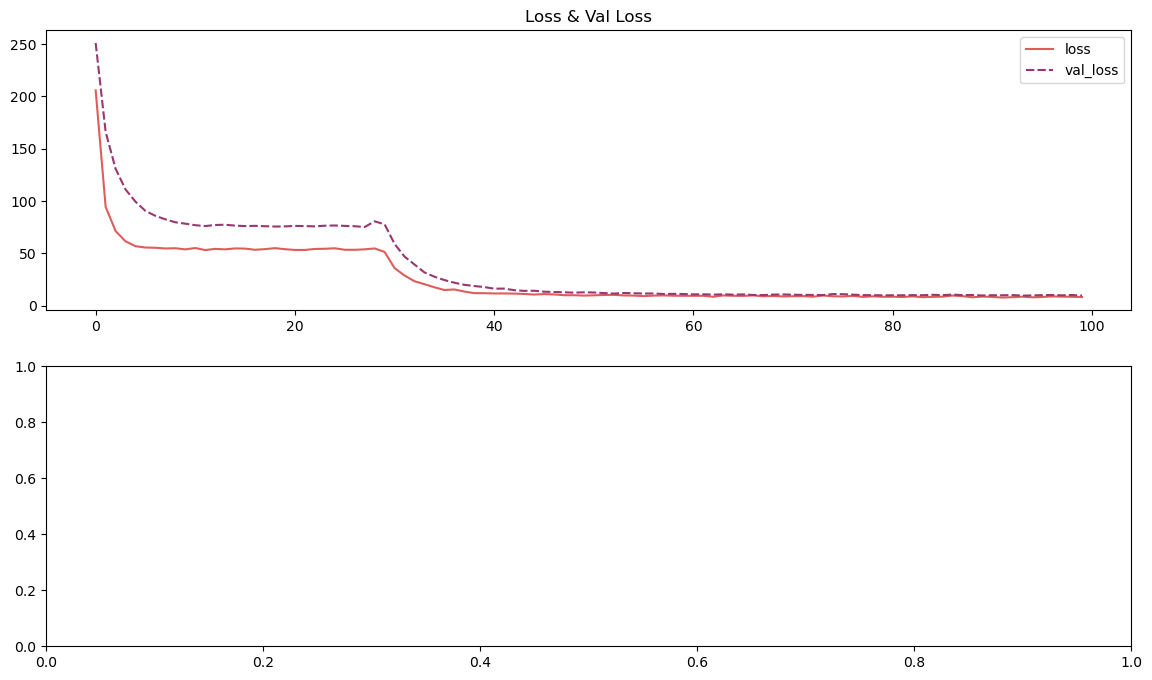

In [98]:
import seaborn as sns
his.columns
history_loss = his[['loss', 'val_loss']]


fig,axes = plt.subplots(2,1,figsize=(14,8))
plt.subplot(2,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");



In [99]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 388ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


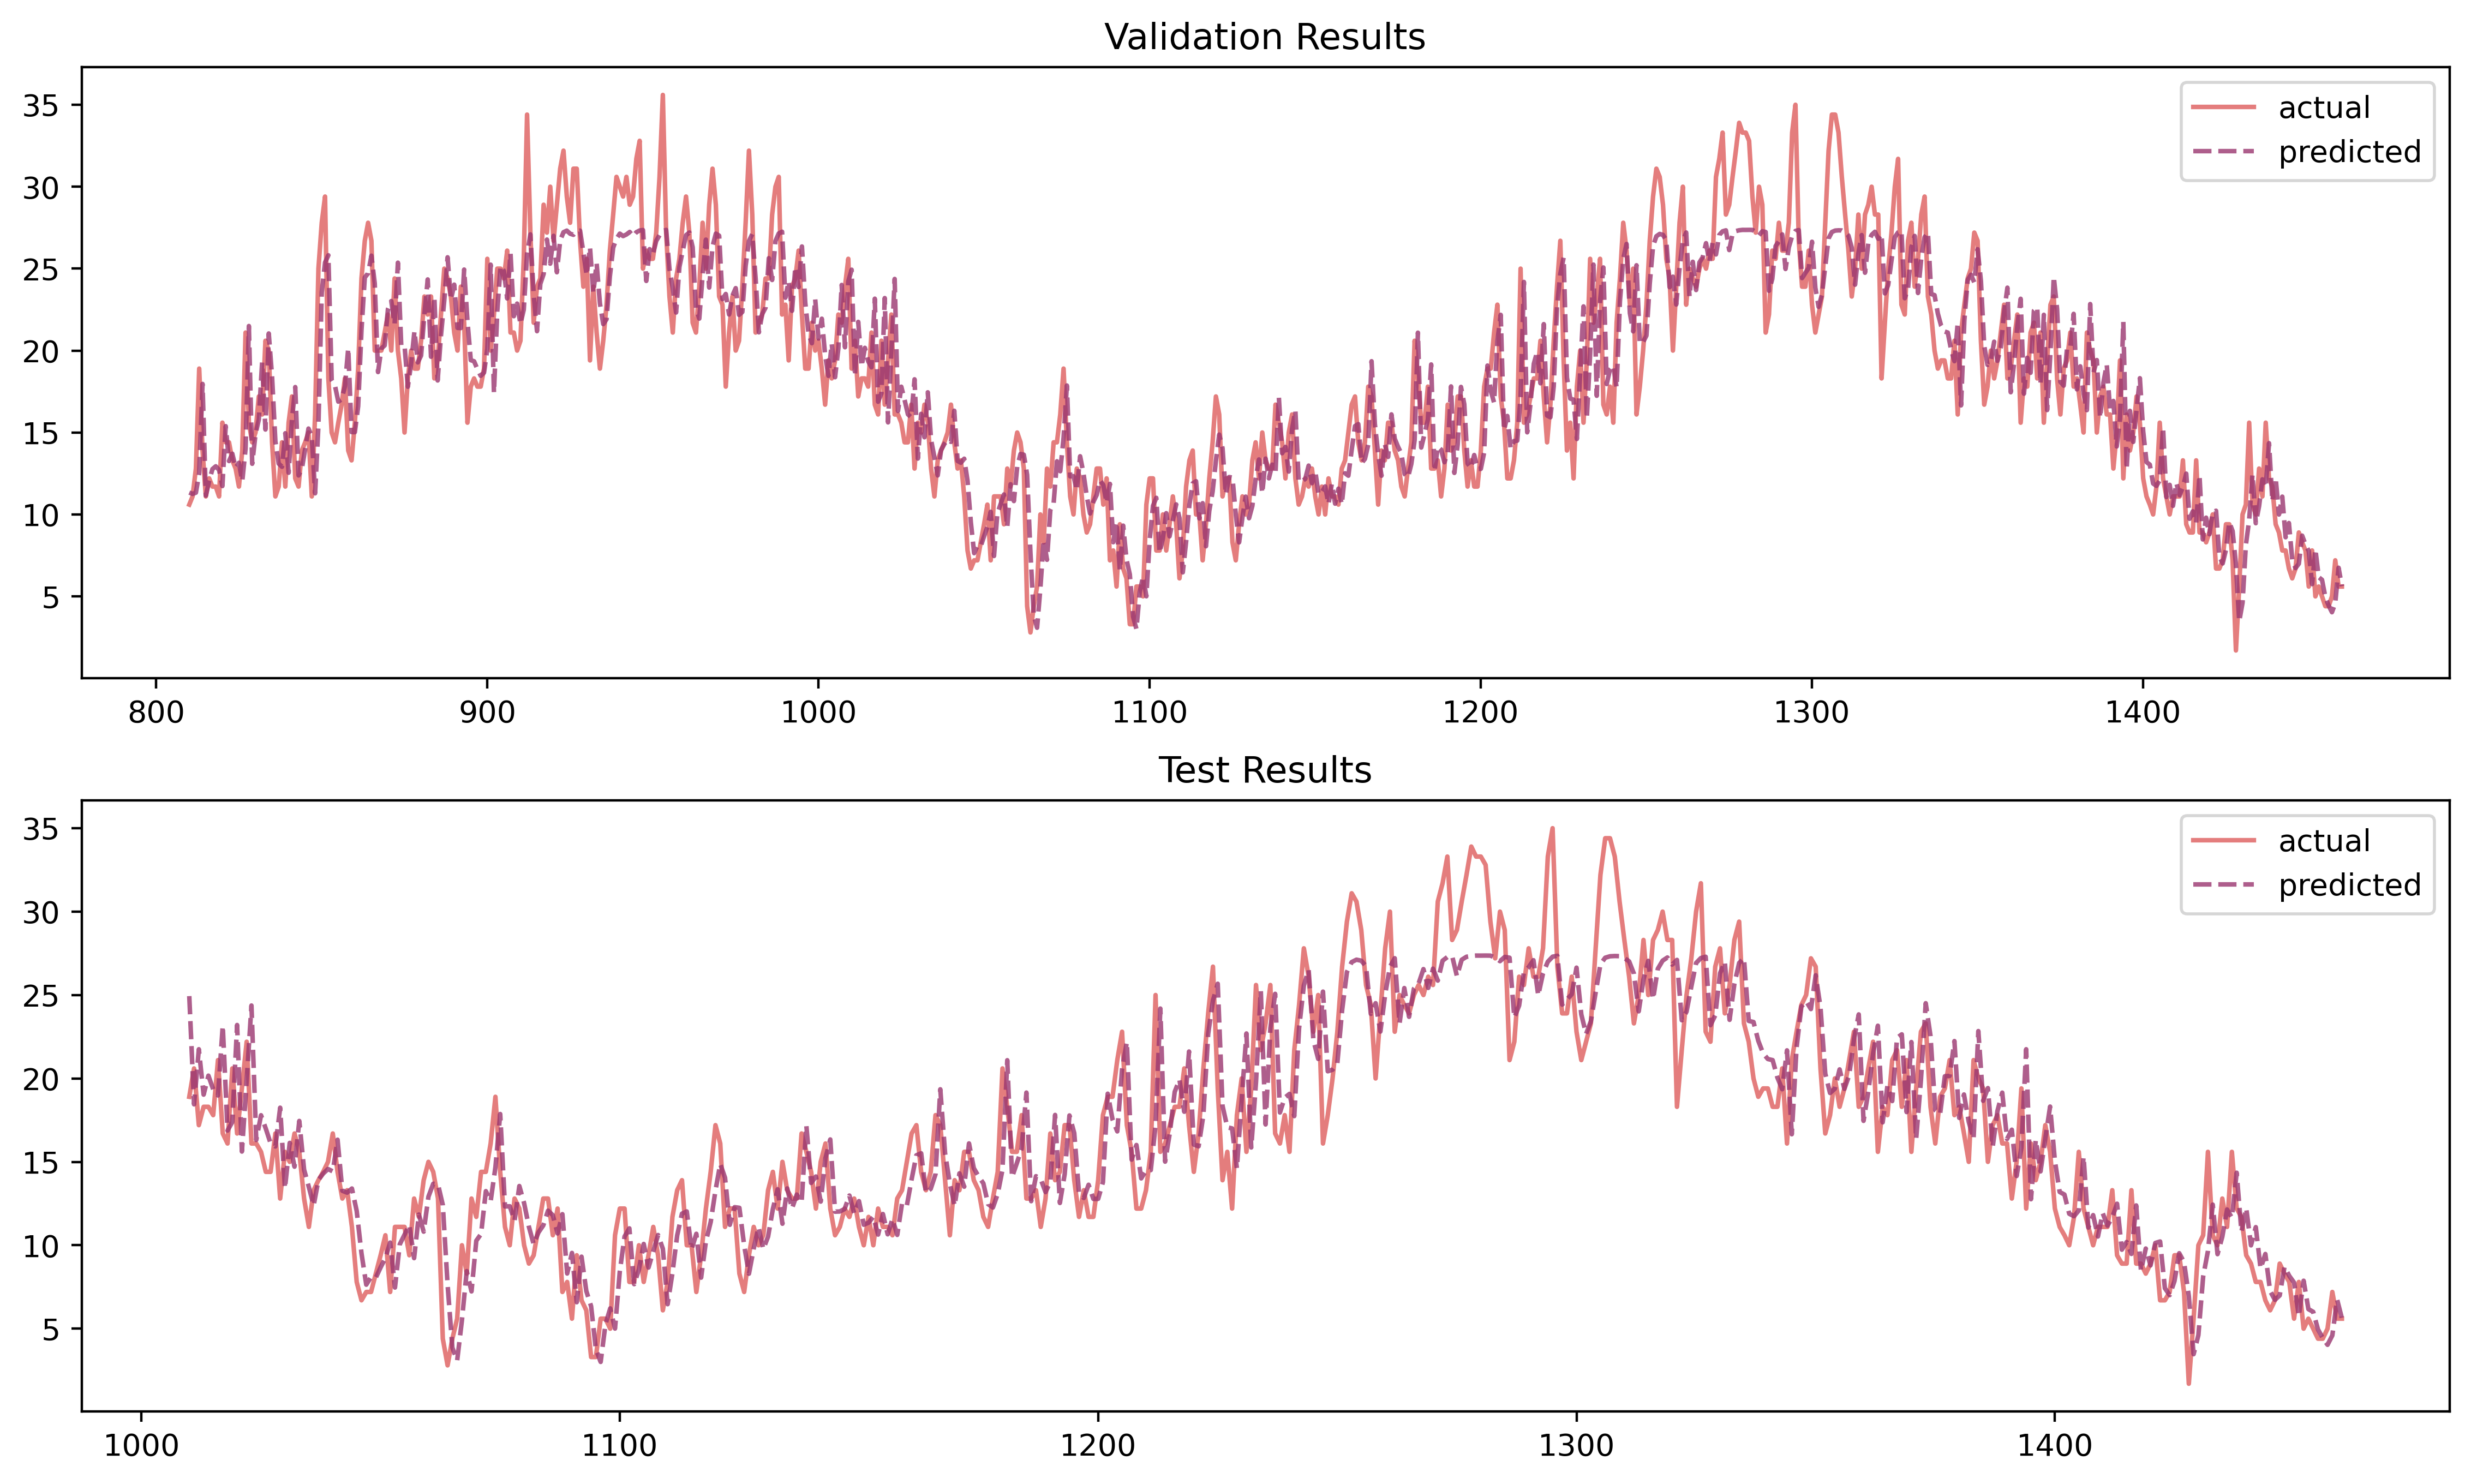

In [100]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);